<a href="https://colab.research.google.com/github/junietan/basicPythonMLlessons/blob/main/3_Iris%2BDT%2Bsplit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the relevant packages
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree


### The dataset

In [ ]:
# We can load the iris dataset straight from sklearn
iris = load_iris()


In [ ]:
# Understanding the iris dataset
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("Shape of data:", iris.data.shape)
print("Description:\n", iris.DESCR)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Shape of data: (150, 4)
Description:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.

In [ ]:
# load data and target from iris dataset
X, y = iris.data, iris.target

# Check what the input looks like
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
# Check what the target looks like
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# We see that there are 150 samples, each with 4 feauters
np.shape(X)

(150, 4)

### Splitting the data
When a model is trained on the entire dataset, it can memorize the data rather than learning the underlying patterns. This phenomenon is called **overfitting**.

The model will perform exceptionally well on the data it has seen but will likely perform poorly on new, unseen data. Splitting the data allows you to train the model on one portion (the training set) and then test its ability to generalize to a different, unseen portion (the testing set)

In [ ]:
from sklearn.model_selection import train_test_split

# we need to split the dataset into a train and test samples (e.g., 80% train, 20% test)
train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=66) # fix for reproducibility

print(f"Training set size: {train_input.shape[0]} samples")
print(f"Testing set size: {test_input.shape[0]} samples")

Training set size: 120 samples
Testing set size: 30 samples


### Creating the decision tree

In [ ]:
# First, we need to define the decision tree and its parameters, if any
# Then, we need to train/create the tree based on the data
# Both are easily achieved through sklearn, with 2 simple commands

In [ ]:
# Defining the tree classifier
clf = DecisionTreeClassifier()

In [ ]:
# Training/creating the decision tree
clf = clf.fit(train_input, train_target)

In [ ]:
# At this point, we have created a fully working decision tree for the Iris dataset

In [ ]:
# We can now give this tree an input, and it will predict the class of the flower
test_pred = clf.predict(test_input)
test_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 0, 1,
       1, 2, 1, 2, 0, 0, 2, 2])

In [ ]:
test_target

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1,
       1, 2, 1, 2, 0, 0, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(test_target,test_pred)

print(f"The accuracy of the model is: {accuracy:.2f}")

The accuracy of the model is: 0.93


### Visualizing the tree

In [ ]:
# With sklearn, we also have capabilities to plot the tree

[Text(0.5, 0.9, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.46153846153846156, 0.8, 'True  '),
 Text(0.5769230769230769, 0.7, 'x[3] <= 1.75\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]'),
 Text(0.5384615384615384, 0.8, '  False'),
 Text(0.3076923076923077, 0.5, 'x[2] <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(0.15384615384615385, 0.3, 'x[3] <= 1.65\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'x[3] <= 1.55\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8461538461538461, 0.5, 'x[2] <= 4.85\ngini = 

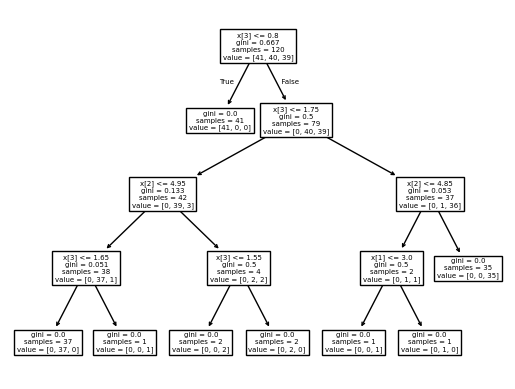

In [ ]:
# The default plot_tree function returns a list with text information about the tree and also plots a small image of it
plot_tree(clf)

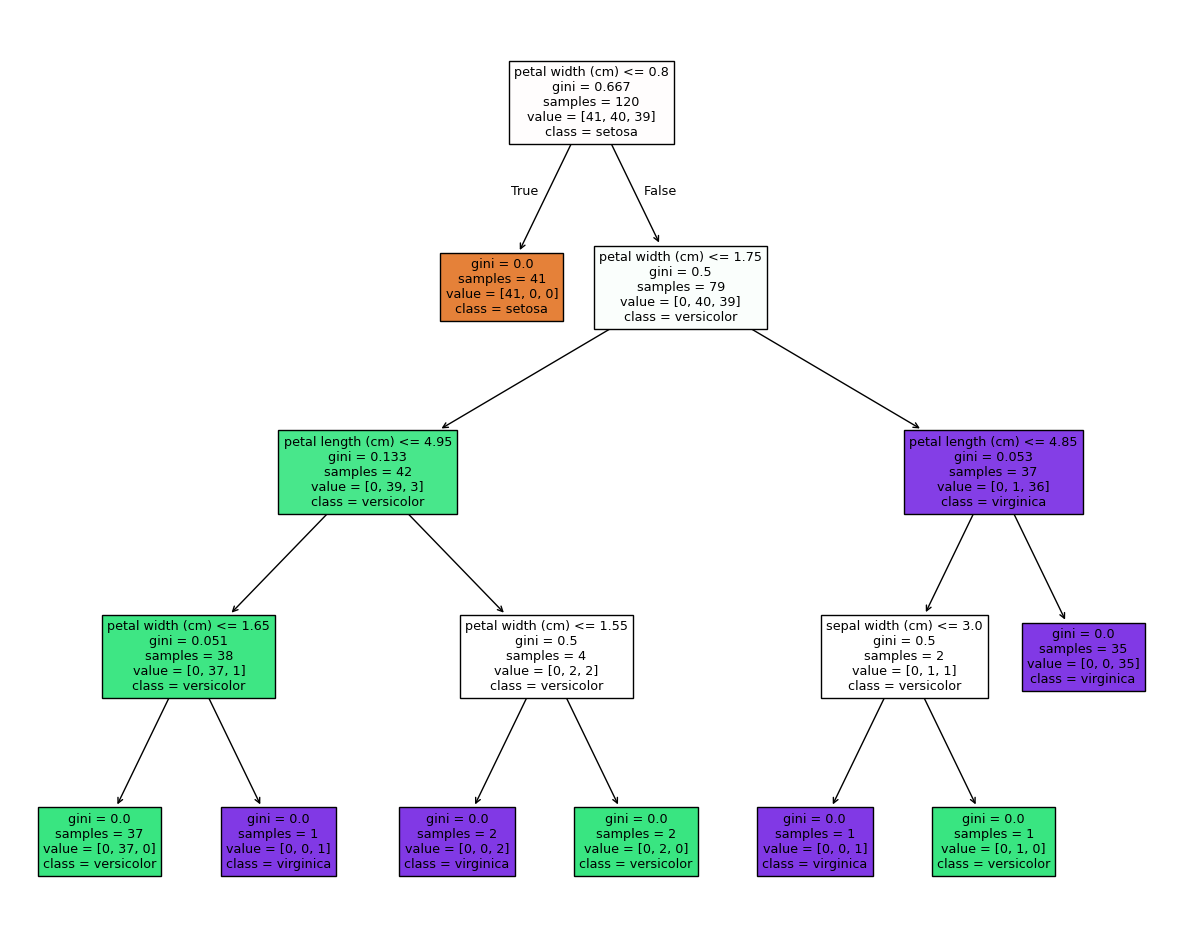

In [ ]:
plt.figure(figsize=(15,12))
plot_tree(clf, filled=True,
          feature_names=iris.feature_names,
          class_names=iris.target_names)

plt.show()

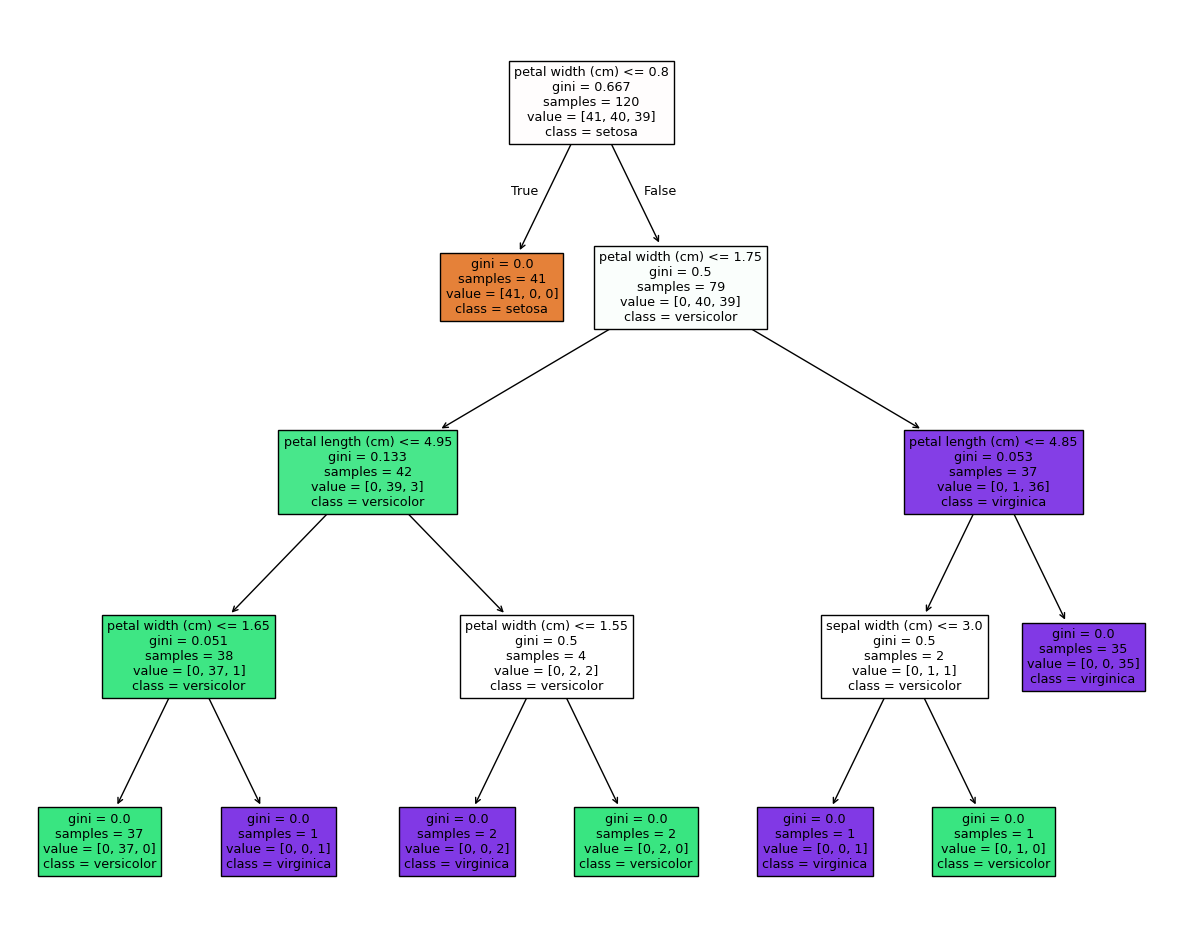

In [ ]:
plt.figure(figsize=(15,12))
plot_tree(clf, filled=True,
          feature_names=iris.feature_names,
          class_names=iris.target_names)

plt.show()

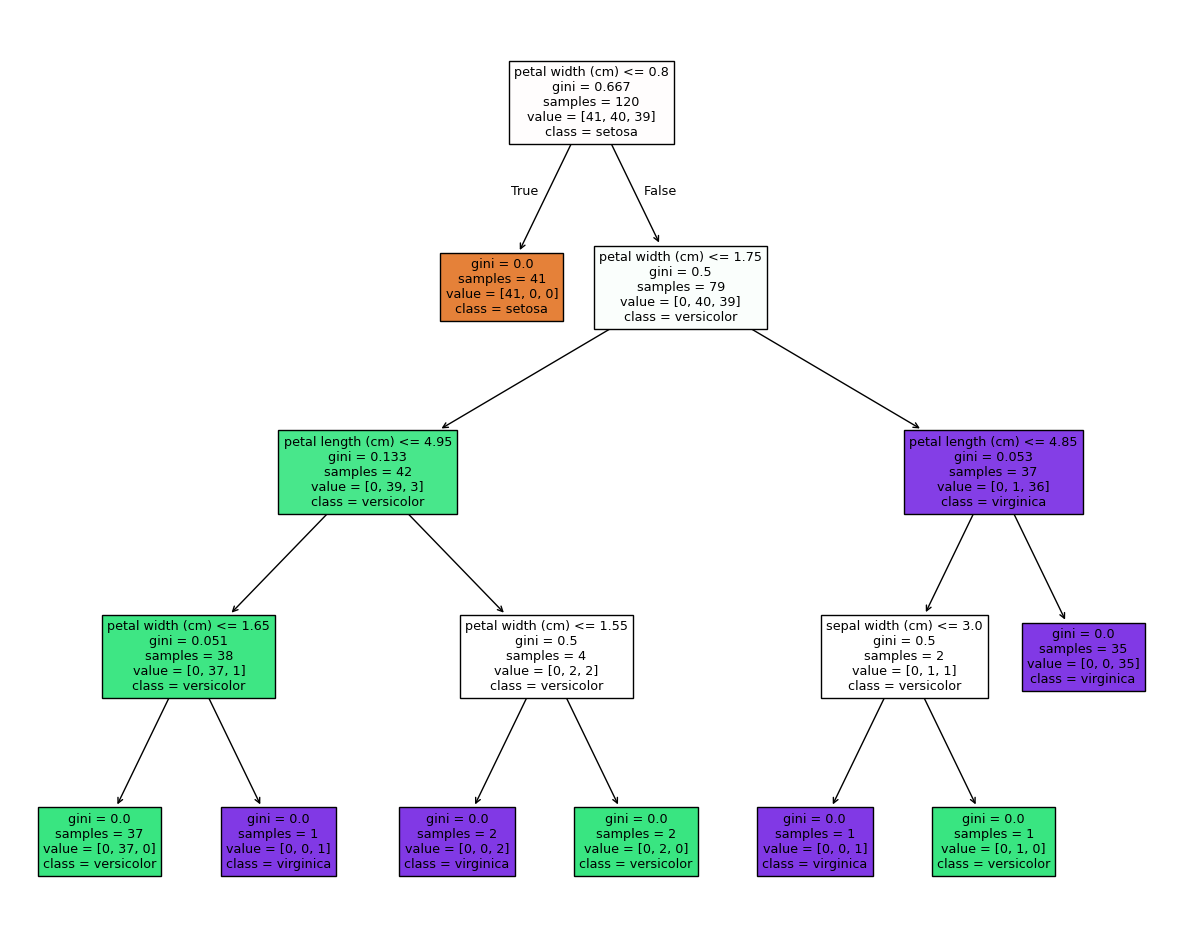

In [ ]:
# To better visualize it, we can use matplotlib, and control the size of the figure
plt.figure(figsize=(15,12))
plot_tree(clf, filled=True,
          feature_names=iris.feature_names,
          class_names=iris.target_names)

plt.show()

In [ ]:
# As can be seen from the image above, though, the features and classes don't have names
# It is not informative, as we don't know what feature X[2] corresponds to
# So, we can add a list of feature and class names to the function

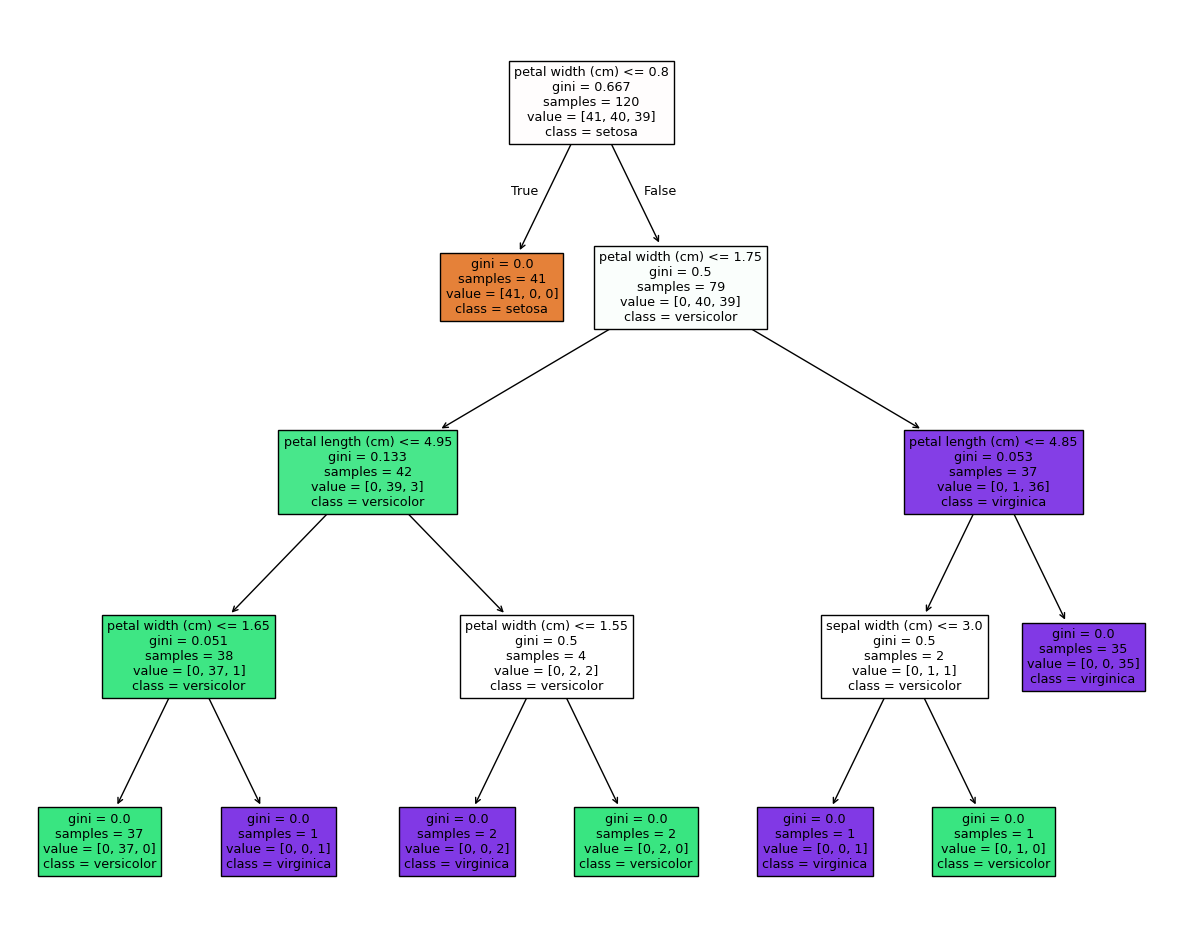

In [ ]:
# Adding the feature and class names, as well
plt.figure(figsize=(15,12))
plot_tree(clf, filled=True,
          feature_names=iris.feature_names,
          class_names=iris.target_names)
plt.show()